In [8]:
# This file calculates gradient norm during the training of a DNN 

#import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [9]:

X = torch.rand((1000, 1))
Y= torch.sin(5*math.pi*X)/(5*math.pi*X)

In [10]:
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 24)
        self.fc2 = nn.Linear(24, 16)
        self.fc3 = nn.Linear(16, 10)
        self.fc4 = nn.Linear(10, 8)        
        self.fc5 = nn.Linear(8, 4)
        self.fc6 = nn.Linear(4, 1)        
        
    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = F.relu(self.fc4(val))
        val = F.relu(self.fc5(val))
        val = self.fc6(val)
        return val


In [11]:
# Set up necessary auxilaries for neural net training
model2 = Model2()
costFunc = nn.MSELoss()
opt = optim.Adam(model2.parameters(), lr=0.001)
EPOCHS = 1000

In [12]:
# Train Network 
model2_cost = []
gradNormList = []
for index in range(EPOCHS):
    model2.zero_grad()
    output = model2(X)
    cost = costFunc(output, Y)
    model2_cost.append(cost.detach().numpy())
    cost.backward()
    opt.step() 
    
    # Get gradient norm (From slides)
    gradAll = 0.0
    for p in model2.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy() ** 2).sum()
        gradAll += grad
    gradNorm = gradAll ** 0.5
    gradNormList.append(gradNorm)
    

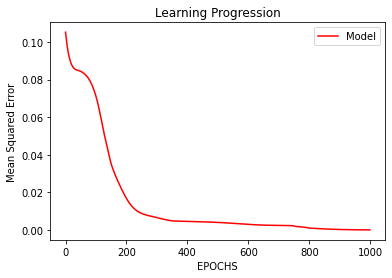

In [13]:
# Visulaize Training process of cos function
plt.plot(range(EPOCHS), model2_cost, 'r', label='Model')
plt.title("Learning Progression")
plt.xlabel("EPOCHS")
plt.ylabel("Mean Squared Error")
plt.legend(loc="upper right")
plt.show()

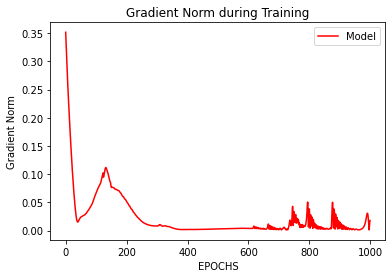

In [14]:
# Visulaize Gradient Norm of cos function during training
plt.plot(range(EPOCHS), gradNormList, 'r', label='Model')
plt.title("Gradient Norm during Training")
plt.xlabel("EPOCHS")
plt.ylabel("Gradient Norm")
plt.legend(loc="upper right")
plt.show()